                                   Problem Statement: Abalone Age Prediction
Description:- Predicting the age of abalone from physical measurements. The age of abalone is
determined by cutting the shell through the cone, staining it, and counting the number of rings through
a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain,
are used to predict age. Further information, such as weather patterns and location (hence food
availability) may be required to solve the problem.

Attribute Information:
Given is the attribute name, attribute type, measurement unit, and a brief description. The number of
rings is the value to predict: either as a continuous value or as a classification problem.

Name / Data Type / Measurement Unit / Description

1- Sex / nominal / -- / M, F, and I (infant)

2- Length / continuous / mm / Longest shell measurement

3- Diameter / continuous / mm / perpendicular to length

4- Height / continuous / mm / with meat in shell

5- Whole weight / continuous / grams / whole abalone

6- Shucked weight / continuous / grams / weight of meat

7- Viscera weight / continuous / grams / gut weight (after bleeding)

8- Shell weight / continuous / grams / after being dried

9- Rings / integer / -- / +1.5 gives the age in years

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset into the tool

In [2]:
data=pd.read_csv('./abalone.csv')
df=data.copy()
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df['Age']=df.Rings+1.5
df.drop(columns=['Rings'],inplace=True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [4]:
df.shape

(4177, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [6]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

# Visualization

Univariate Analysis

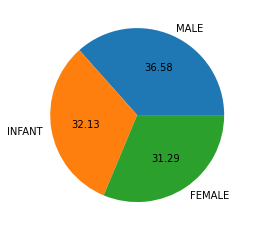

In [7]:
plt.pie(df.Sex.value_counts(),labels=['MALE','INFANT','FEMALE'],autopct="%.2f")
plt.title='Sex of Abalone'
plt.show()


<AxesSubplot:xlabel='Length', ylabel='Density'>

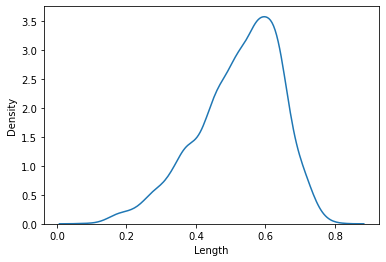

In [8]:
sns.distplot(df.Length,hist=False)

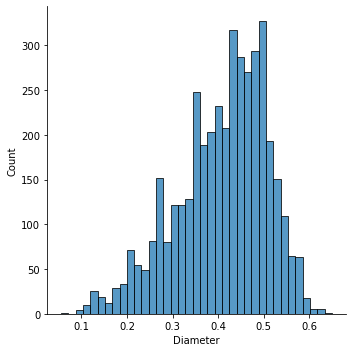

In [9]:
sns.displot(data=df,x='Diameter')

<AxesSubplot:xlabel='Age', ylabel='Density'>

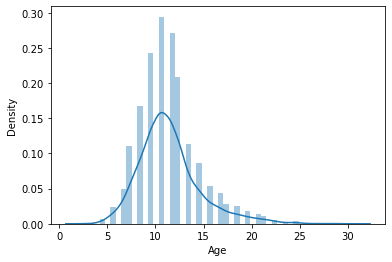

In [10]:
sns.distplot(df.Age)

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

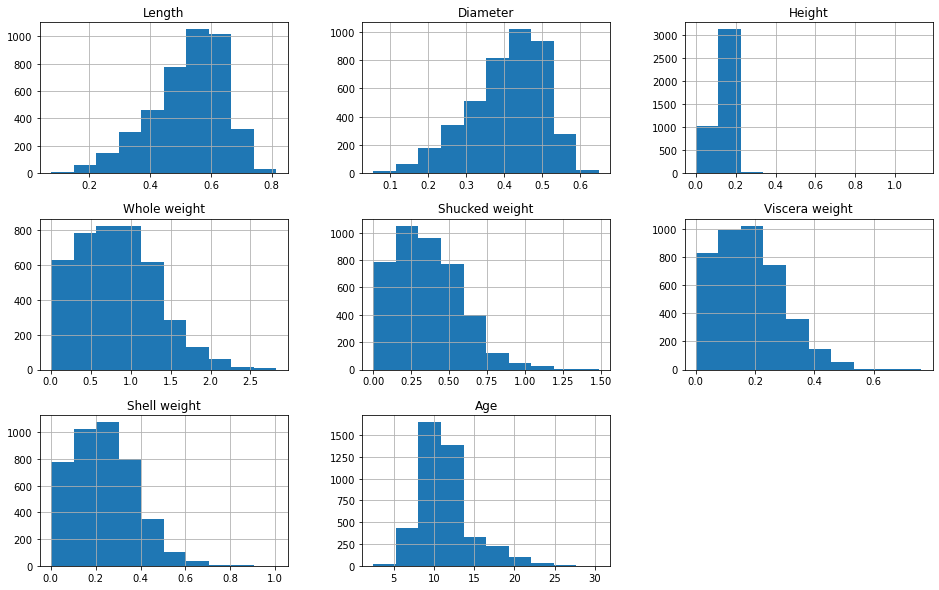

In [11]:
df.hist(figsize=(16,10))

Bi variate Analysis

<AxesSubplot:xlabel='Age', ylabel='count'>

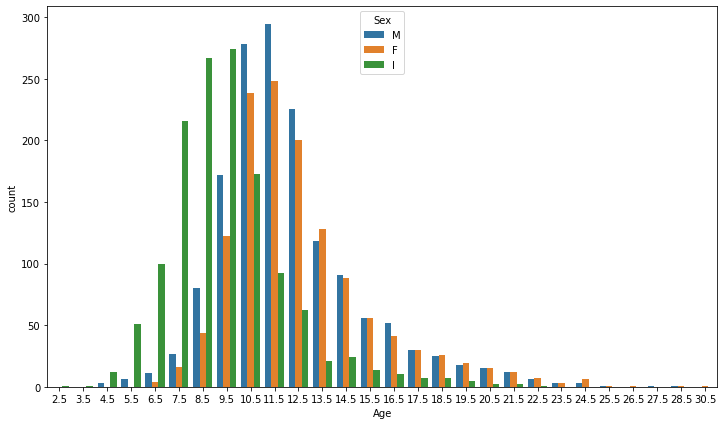

In [12]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='Age',hue='Sex')

<AxesSubplot:xlabel='Viscera weight', ylabel='Age'>

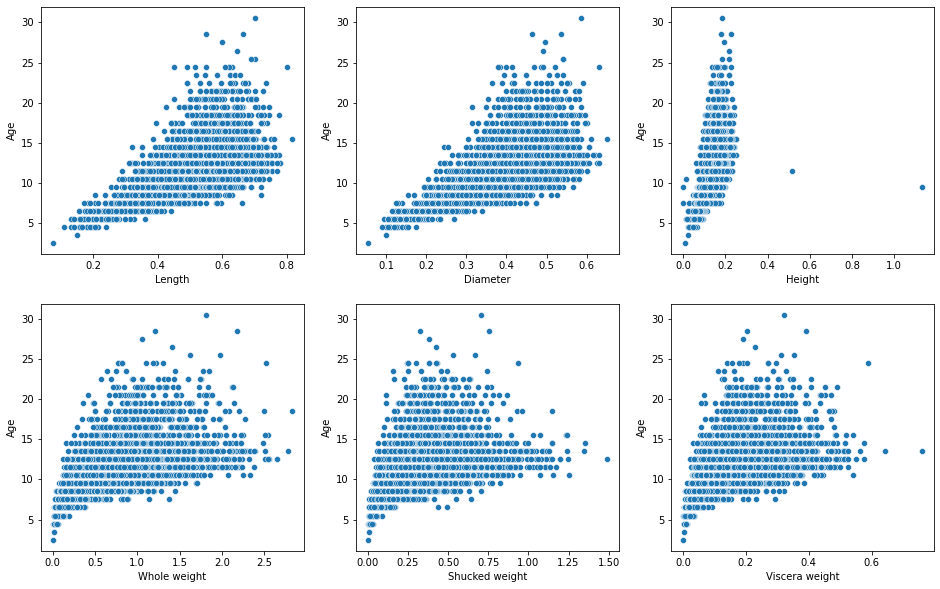

In [13]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.scatterplot(df.Length,df.Age)
plt.subplot(2,3,2)
sns.scatterplot(df.Diameter,df.Age)
plt.subplot(2,3,3)
sns.scatterplot(df.Height,df.Age)
plt.subplot(2,3,4)
sns.scatterplot(df['Whole weight'],df.Age)
plt.subplot(2,3,5)
sns.scatterplot(df['Shucked weight'],df.Age)
plt.subplot(2,3,6)
sns.scatterplot(df['Viscera weight'],df.Age)

Multi variate Analysis

<AxesSubplot:>

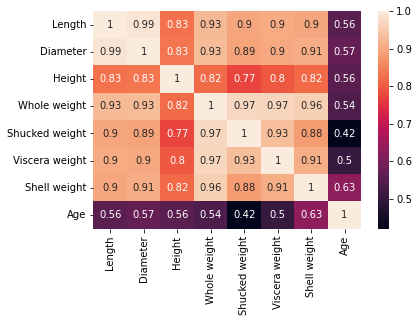

In [15]:
sns.heatmap(df.corr(),annot=True)

# Descriptive Analysis

In [16]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


# Handle null values

In [17]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

# Find and replace the outliers

<AxesSubplot:xlabel='Age'>

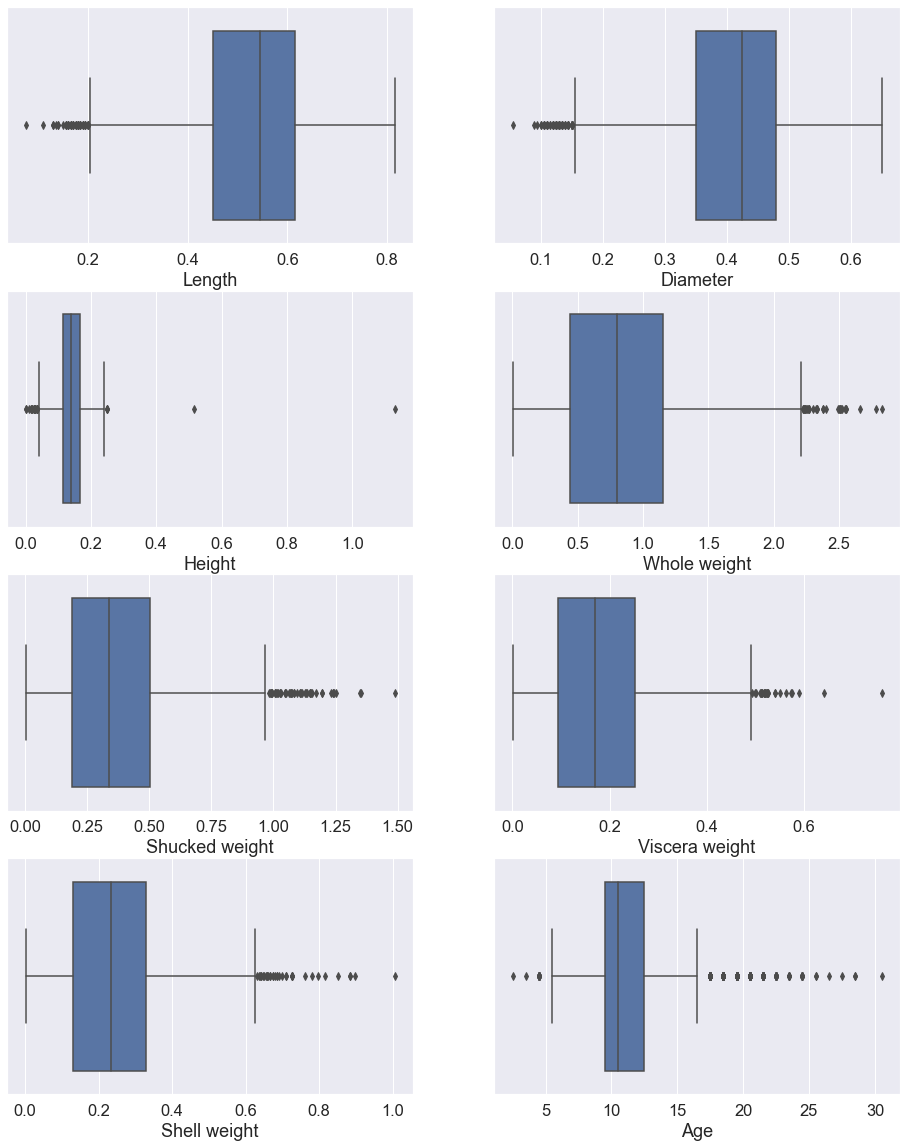

In [18]:
plt.figure(figsize=(16,20))
sns.set_theme(font_scale=1.5)
plt.subplot(4,2,1)
sns.boxplot(df.Length)
plt.subplot(4,2,2)
sns.boxplot(df.Diameter)
plt.subplot(4,2,3)
sns.boxplot(df.Height)
plt.subplot(4,2,4)
sns.boxplot(df['Whole weight'])
plt.subplot(4,2,5)
sns.boxplot(df['Shucked weight'])
plt.subplot(4,2,6)
sns.boxplot(df['Viscera weight'])
plt.subplot(4,2,7)
sns.boxplot(df['Shell weight'])
plt.subplot(4,2,8)
sns.boxplot(df.Age)

<AxesSubplot:xlabel='Length'>

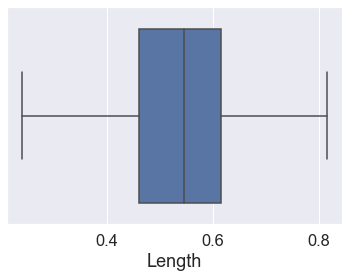

In [19]:
p_length_2=df.Length.quantile(0.02)
df.Length=np.where(df.Length <= p_length_2,df.Length.median(),df.Length)
sns.boxplot(df.Length)

<AxesSubplot:xlabel='Diameter'>

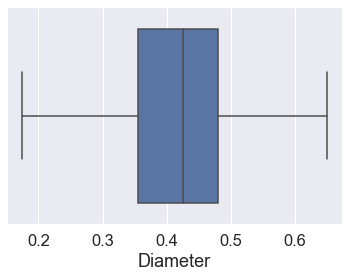

In [20]:
p_diameter_1=df.Diameter.quantile(0.02)
df.Diameter=np.where(df.Diameter < p_diameter_1,df.Diameter.median(),df.Diameter)
sns.boxplot(df.Diameter)

<AxesSubplot:xlabel='Height'>

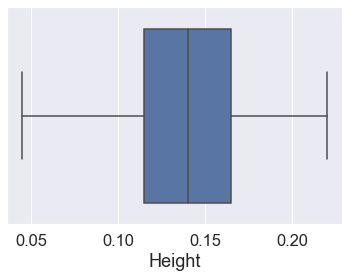

In [21]:
p_height_1=df.Height.quantile(0.01)
p_height_99=df.Height.quantile(0.99)
df.Height=np.where(df.Height < p_height_1 ,df.Height.median(),df.Height)
df.Height=np.where(df.Height > p_height_99 ,df.Height.median(),df.Height)
sns.boxplot(df.Height)

<AxesSubplot:xlabel='Whole weight'>

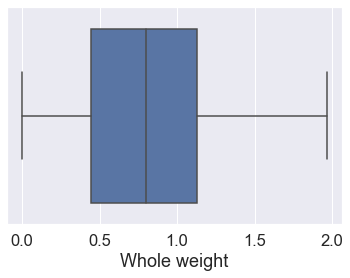

In [24]:
p_Wweight_99=df['Whole weight'].quantile(0.99)
df['Whole weight']=np.where(df['Whole weight'] > p_Wweight_99,df['Whole weight'].median(),df['Whole weight'])
sns.boxplot(df['Whole weight'])

<AxesSubplot:xlabel='Shucked weight'>

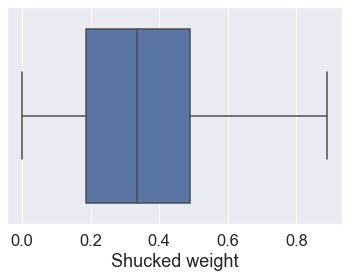

In [25]:
p_Shuc_weight_99=df['Shucked weight'].quantile(0.98)
df['Shucked weight']=np.where(df['Shucked weight'] > p_Shuc_weight_99,df['Shucked weight'].median(),df['Shucked weight'])
sns.boxplot(df['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight'>

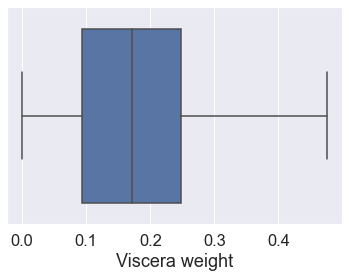

In [26]:
p_Vweight_99=df['Viscera weight'].quantile(0.99)
df['Viscera weight']=np.where(df['Viscera weight'] > p_Vweight_99,df['Viscera weight'].median(),df['Viscera weight'])
sns.boxplot(df['Viscera weight'])

<AxesSubplot:xlabel='Shell weight'>

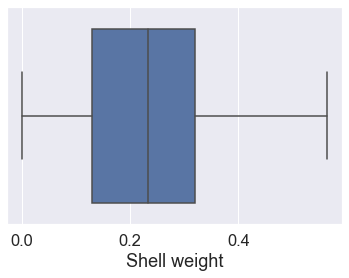

In [27]:
p_Shell_weigth_99=df['Shell weight'].quantile(0.98)
df['Shell weight']=np.where(df['Shell weight'] > p_Shell_weigth_99,df['Shell weight'].median(),df['Shell weight'])
sns.boxplot(df['Shell weight'])

# Check for categorical columns and perform encoding

In [29]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [30]:
from sklearn.preprocessing import LabelEncoder
l_encode=LabelEncoder()
df.Sex=l_encode.fit_transform(df.Sex)

In [31]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# Split the data into dependent an independent variables

In [32]:
Y=df.Age
X=df.drop(columns=['Age'],axis=1)

In [33]:
Y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

In [34]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


# Scale the independent variables

In [35]:
from sklearn.preprocessing import scale
scaled_X=pd.DataFrame(scale(X),columns=X.columns)
scaled_X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.151980,-0.692304,-0.526732,-1.230869,-0.639022,-0.606834,-0.731555,-0.640298
1,1.151980,-1.646514,-1.616487,-1.369570,-1.282301,-1.234320,-1.236340,-1.276135
2,-1.280690,-0.010726,0.072633,-0.121267,-0.275575,-0.446198,-0.342150,-0.163421
3,1.151980,-0.828620,-0.526732,-0.398668,-0.634563,-0.652013,-0.606561,-0.600559
4,-0.064355,-1.828268,-1.725463,-1.646970,-1.328011,-1.284519,-1.322874,-1.395354
...,...,...,...,...,...,...,...,...
4172,-1.280690,0.307344,0.399559,0.710934,0.192670,0.123559,0.595307,0.146549
4173,1.151980,0.534537,0.290584,-0.121267,0.368820,0.469931,0.359741,0.237951
4174,1.151980,0.625414,0.671998,1.820537,0.837065,0.904152,1.061632,0.615478
4175,-1.280690,0.852607,0.780974,0.294834,0.655341,0.931761,0.806836,0.520103


# Split the data into training and testing

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(scaled_X,Y,test_size=0.3,random_state=42)

In [37]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(2923, 8) (1254, 8) (2923,) (1254,)


In [38]:
X_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
2830,-1.280690,-0.056165,0.181608,-0.121267,0.095677,0.437302,0.028025,-0.389938
925,-0.064355,-0.919497,-0.962634,-1.092169,-0.972368,-0.943167,-0.909432,-0.997956
3845,1.151980,-0.692304,-0.690195,-0.953469,-0.857536,-0.918067,-0.770015,-0.680038
547,1.151980,0.125590,0.127121,-2.617872,-1.690344,-1.648461,-1.649782,-1.709298
2259,-1.280690,0.534537,0.563023,0.572234,0.668719,0.806264,0.725109,0.512155
...,...,...,...,...,...,...,...,...
3444,-1.280690,-0.374234,-0.145318,-0.676068,-0.516386,-0.448708,-0.428684,-0.680038
466,-1.280690,1.261554,1.489314,1.404436,1.315343,0.989490,1.215471,1.346690
3092,1.151980,-0.192480,-0.199806,-0.398668,-0.490744,-0.508946,-0.419069,-0.338276
3772,1.151980,0.398221,0.563023,-0.537368,0.563922,0.856463,0.398201,0.035278


In [39]:
Y_train

2830    10.5
925      8.5
3845    12.5
547      8.5
2259    14.5
        ... 
3444    10.5
466     13.5
3092    12.5
3772    10.5
860      7.5
Name: Age, Length: 2923, dtype: float64

In [40]:
X_test

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
866,1.15198,0.670852,0.454047,0.572234,0.675409,0.379573,1.196241,0.750594
1483,1.15198,0.534537,0.290584,0.294834,0.160339,0.208897,0.364548,0.114757
599,-1.28069,0.261905,0.345072,1.543136,0.402266,-0.202733,0.455890,0.830073
1702,-1.28069,0.943484,0.835461,0.849635,1.027707,0.969410,0.859718,1.187731
670,1.15198,-0.510550,-0.308781,0.156133,-0.408244,-0.554125,-0.664250,-0.123681
...,...,...,...,...,...,...,...,...
162,1.15198,0.716291,0.780974,0.988335,0.989802,0.997019,1.152974,0.909553
2206,-1.28069,-2.191777,-2.052389,-1.785671,-1.472944,-1.475275,-1.476713,-1.514573
3980,-1.28069,-0.056165,-0.036343,-0.676068,-0.058175,0.354474,-0.135429,-0.401860
3075,-1.28069,1.352431,1.162388,1.265735,1.546121,1.353431,2.080816,1.394378


In [41]:
Y_test

866     10.5
1483     9.5
599     17.5
1702    10.5
670     15.5
        ... 
162     13.5
2206     6.5
3980     8.5
3075    12.5
2148     9.5
Name: Age, Length: 1254, dtype: float64

# Build the Model

In [42]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()

# Train the model

In [43]:
le.fit(X_train,Y_train)

LinearRegression()

In [44]:
le.coef_

array([-0.02932136, -1.15445144,  1.11245463,  1.09805024,  1.28572489,
       -1.73520628,  0.05449915,  1.1962292 ])

# Test the model

In [45]:
pred=le.predict(X_test)

In [46]:
from sklearn import metrics
metrics.mean_squared_error(Y_test,pred)

5.928155592319444

In [47]:
np.sqrt(metrics.mean_squared_error(Y_test,pred))

2.434780399198138

In [48]:
metrics.r2_score(Y_test,pred)

0.4162073881689009